# Prepare Data

Plan - Acquire - **Prepare** - Explore - Model - Deliver

## What we are doing and why:

**What:** Clean and tidy our data so that it is ready for exploration, analysis and modeling

**Why:** Set ourselves up for certainty! 

    1) Ensure that our observations will be sound:
        Validity of statistical and human observations
    2) Ensure that we will not have computational errors:
        non numerical data cells, nulls/NaNs
    3) Protect against overfitting:
        Ensure that have a split data structure prior to drawing conclusions

## High level Roadmap:

**Input:** An aquired dataset (One Pandas Dataframe) 

**Output:** Cleaned data split into Train, Validate, and Test sets (Three Pandas Dataframes)

**Processes:** Inspect and summarize the data ---> Clean the data ---> Split the data

## Inspect and Summarize

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# train test split from sklearn
from sklearn.model_selection import train_test_split
# imputer from sklearn, fills in nulls
from sklearn.impute import SimpleImputer

# filter out warnings
import warnings
warnings.filterwarnings('ignore')

# our own acquire script:
import acquire

## Inspect and Summarize

In [2]:
df = acquire.get_titanic_data()

In [3]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [5]:
pd.crosstab(df['class'], df.pclass)
#to chech if its duplicated.

pclass,1,2,3
class,,,
First,216,0,0
Second,0,184,0
Third,0,0,491


In [6]:
pd.crosstab(df['embarked'], df.embark_town)

embark_town,Cherbourg,Queenstown,Southampton
embarked,,,
C,168,0,0
Q,0,77,0
S,0,0,644


#### Gather our takeaways, i.e., what we are going to do when we clean:
- survived/ is our target variable(it will not be a "feature" of our model).
- passanger_id/ needs to be removed.
- pclass/ and class/ are same data. we will need to decide which one is worth keeping.
- embarked/ and embark_town/ are the same(look at the data above), decide what to keep.

In [7]:
df.describe()

,passenger_id,survived,pclass,age,sibsp,parch,fare,alone
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,445.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.602694
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.489615
min,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,445.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,667.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,890.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [8]:
df.columns

Index(['passenger_id', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch',
       'fare', 'embarked', 'class', 'deck', 'embark_town', 'alone'],
      dtype='object')

In [9]:
numcols = [col for col in df.columns if df[col].dtype != 'O']

In [10]:
numcols

['passenger_id',
 'survived',
 'pclass',
 'age',
 'sibsp',
 'parch',
 'fare',
 'alone']

In [11]:
catcols = [col for col in df.columns if df[col].dtype == 'O']

In [12]:
catcols

['sex', 'embarked', 'class', 'deck', 'embark_town']

In [13]:
#describe the object columns
for col  in catcols:
    print(f"column: {col}")
    print(df[col].value_counts())
    print("--------")
    print(df[col].value_counts(normalize=True, dropna=False))
    print("=================")
    
    ### dropna = remove nulls

column: sex
male      577
female    314
Name: sex, dtype: int64
--------
male      0.647587
female    0.352413
Name: sex, dtype: float64
column: embarked
S    644
C    168
Q     77
Name: embarked, dtype: int64
--------
S      0.722783
C      0.188552
Q      0.086420
NaN    0.002245
Name: embarked, dtype: float64
column: class
Third     491
First     216
Second    184
Name: class, dtype: int64
--------
Third     0.551066
First     0.242424
Second    0.206510
Name: class, dtype: float64
column: deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64
--------
NaN    0.772166
C      0.066218
B      0.052750
D      0.037037
E      0.035915
A      0.016835
F      0.014590
G      0.004489
Name: deck, dtype: float64
column: embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64
--------
Southampton    0.722783
Cherbourg      0.188552
Queenstown     0.086420
NaN            0.002245
Name: embark_town, dtype: float64


passenger_id
survived
pclass
age
sibsp
parch
fare
alone


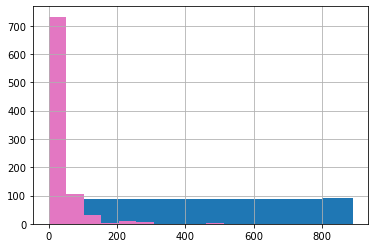

In [14]:
# histograms of numeric columns
for col in numcols:
    print(col)
    df[col].hist()
    plt.show

### take aways
- remove enbarked
- removed class
- remove passanger_id
- remove deck
    - has too many nulls, i would need to build a predictieve model, not worth the time.
- lots of missing information in age
    - going to have to impute nulls
- two nulls in emabrk_town
    - going to have to impute nulls(maybe use mode)

## Clean

In [15]:
# drop duplicates
df.drop_duplicates(inplace=True)

### droping columns

In [16]:
columns_to_drop = ['embarked','class','passenger_id', 'deck']

In [17]:
data = df.drop(columns = columns_to_drop)

In [18]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,Southampton,0
1,1,1,female,38.0,1,0,71.2833,Cherbourg,0
2,1,3,female,26.0,0,0,7.9250,Southampton,1
3,1,1,female,35.0,1,0,53.1000,Southampton,0
4,0,3,male,35.0,0,0,8.0500,Southampton,1


### changing strings into nums

In [19]:
# encoding steps 
# 1. make a data frame out of "dummy columns"
# 2. concate our dummy dataframe to our original data frame

dummy_df = pd.get_dummies(data[['sex', 'embark_town']], dummy_na=False, drop_first=[True,True])

In [20]:
dummy_df

,sex_male,embark_town_Queenstown,embark_town_Southampton
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1
...,...,...,...
886,1,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [21]:
# Concatenate my dummy_df to my data

data = pd.concat([data, dummy_df], axis=1)
data

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,male,22.0,1,0,7.2500,Southampton,0,1,0,1
1,1,1,female,38.0,1,0,71.2833,Cherbourg,0,0,0,0
2,1,3,female,26.0,0,0,7.9250,Southampton,1,0,0,1
3,1,1,female,35.0,1,0,53.1000,Southampton,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,Southampton,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,Southampton,1,1,0,1
887,1,1,female,19.0,0,0,30.0000,Southampton,1,0,0,1
888,0,3,female,NaN,1,2,23.4500,Southampton,0,0,0,1
889,1,1,male,26.0,0,0,30.0000,Cherbourg,1,1,0,0


#### Encoding: Turning Categorical Values into Boolean Values (0,1)
 - We have two options: simple encoding or one-hot encoding

## Putting our Work Into a Function

In [22]:
def clean_titanic_data(df):
    '''
    Takes in a titanic dataframe and returns a cleaned dataframe
    Arguments: df - a pandas dataframe with the expected feature names and columns
    Return: clean_df - a dataframe with the cleaning operations performed on it
    '''
    # Drop duplicates
    df.drop_duplicates(inplace=True)
    # Drop columns 
    columns_to_drop = ['embarked', 'class', 'passenger_id', 'deck']
    df = df.drop(columns = columns_to_drop)
    # encoded categorical variables
    dummy_df = pd.get_dummies(df[['sex', 'embark_town']], dummy_na=False, drop_first=[True, True])
    df = pd.concat([df, dummy_df], axis=1)
    return df.drop(columns=['sex', 'embark_town'])    

In [23]:
df = acquire.get_titanic_data()
clean_df = clean_titanic_data(df)
clean_df

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,22.0,1,0,7.2500,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,1,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,1
888,0,3,NaN,1,2,23.4500,0,0,0,1
889,1,1,26.0,0,0,30.0000,1,1,0,0


In [24]:
df = acquire.get_titanic_data()
clean_df = clean_titanic_data(df)
clean_df

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,22.0,1,0,7.2500,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,1,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,1
888,0,3,NaN,1,2,23.4500,0,0,0,1
889,1,1,26.0,0,0,30.0000,1,1,0,0


## Train, Validate, Test Split

In [25]:
train, test = train_test_split(clean_df,
                               train_size = 0.8,
                               stratify = clean_df.survived,
                               random_state=1234)

In [26]:
train.shape

(712, 10)

In [27]:
test.shape

(179, 10)

In [28]:
train, validate = train_test_split(train,
                                  train_size = 0.7,
                                  stratify = train.survived,
                                  random_state=1234)

In [29]:
train.shape

(498, 10)

In [30]:
validate.shape

(214, 10)

In [31]:
test.shape

(179, 10)

In [32]:
train.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
301,1,3,NaN,2,0,23.2500,0,1,1,0
290,1,1,26.0,0,0,78.8500,1,0,0,1
779,1,1,43.0,0,1,211.3375,0,0,0,1
356,1,1,22.0,0,1,55.0000,0,0,0,1
147,0,3,9.0,2,2,34.3750,0,0,0,1


In [33]:
validate.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
91,0,3,20.0,0,0,7.8542,1,1,0,1
297,0,1,2.0,1,2,151.5500,0,0,0,1
101,0,3,NaN,0,0,7.8958,1,1,0,1
705,0,2,39.0,0,0,26.0000,1,1,0,1
335,0,3,NaN,0,0,7.8958,1,1,0,1


In [34]:
test.head()


,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
92,0,1,46.0,1,0,61.1750,0,1,0,1
552,0,3,NaN,0,0,7.8292,1,1,1,0
810,0,3,26.0,0,0,7.8875,1,1,0,1
29,0,3,NaN,0,0,7.8958,1,1,0,1
681,1,1,27.0,0,0,76.7292,1,1,0,0


## Option for Missing Values: Impute

We can impute values using the mean, median, mode (most frequent), or a constant value. We will use sklearn.imputer.SimpleImputer to do this.  

1. Create the imputer object, selecting the strategy used to impute (mean, median or mode (strategy = 'most_frequent'). 
2. Fit to train. This means compute the mean, median, or most_frequent (i.e. mode) for each of the columns that will be imputed. Store that value in the imputer object. 
3. Transform train: fill missing values in train dataset with that value identified
4. Transform test: fill missing values with that value identified

1. Create the `SimpleImputer` object, which we will store in the variable `imputer`. In the creation of the object, we will specify the strategy to use (`mean`, `median`, `most_frequent`). Essentially, this is creating the instructions and assigning them to a variable we will reference.  

In [35]:
imputer = SimpleImputer(strategy='mean', missing_values=np.nan)

In [36]:
type(imputer)

sklearn.impute._base.SimpleImputer

2. `Fit` the imputer to the columns in the training df.  This means that the imputer will determine the `most_frequent` value, or other value depending on the `strategy` called, for each column.   

In [37]:
imputer = imputer.fit(train[['age']])

3. It will store that value in the imputer object to use upon calling `transform.` We will call `transform` on each of our samples to fill any missing values.  

In [38]:
train[['age']] = imputer.transform(train[['age']])

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 301 to 3
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 498 non-null    int64  
 1   pclass                   498 non-null    int64  
 2   age                      498 non-null    float64
 3   sibsp                    498 non-null    int64  
 4   parch                    498 non-null    int64  
 5   fare                     498 non-null    float64
 6   alone                    498 non-null    int64  
 7   sex_male                 498 non-null    uint8  
 8   embark_town_Queenstown   498 non-null    uint8  
 9   embark_town_Southampton  498 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 32.6 KB


In [40]:
validate[['age']] = imputer.transform(validate[['age']])

Create a function that will run through all of these steps, when I provide a train and test dataframe, a strategy, and a list of columns. 

In [41]:
def impute_age(train, validate, test):
    '''
    Imputes the mean age of train to all three datasets
    '''
    imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
    imputer = imputer.fit(train[['age']])
    train[['age']] = imputer.transform(train[['age']])
    validate[['age']] = imputer.transform(validate[['age']])
    test[['age']] = imputer.transform(test[['age']])
    return train, validate, test

Blend the clean, split and impute functions into a single prep_data() function. 

In [42]:
def prep_titanic_data(df): 
    df = clean_titanic_data(df)
    train, test = train_test_split(df,
                               train_size = 0.8,
                               stratify = df.survived,
                               random_state=1234)
    train, validate = train_test_split(train,
                                  train_size = 0.7,
                                  stratify = train.survived,
                                  random_state=1234)
    train, validate, test = impute_age(train, validate, test)
    return train, validate, test

In [43]:
df = acquire.get_titanic_data()
train, validate, test = prep_titanic_data(df)
train.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
301,1,3,30.189296,2,0,23.2500,0,1,1,0
290,1,1,26.000000,0,0,78.8500,1,0,0,1
779,1,1,43.000000,0,1,211.3375,0,0,0,1
356,1,1,22.000000,0,1,55.0000,0,0,0,1
147,0,3,9.000000,2,2,34.3750,0,0,0,1


## Exercises

The end product of this exercise should be the specified functions in a python script named `prepare.py`.
Do these in your `classification_exercises.ipynb` first, then transfer to the prepare.py file. 

This work should all be saved in your local `classification-exercises` repo. Then add, commit, and push your changes.

Using the Iris Data:  

1. Use the function defined in `acquire.py` to load the iris data.  

1. Drop the `species_id` and `measurement_id` columns.  

1. Rename the `species_name` column to just `species`.  

1. Create dummy variables of the species name. 

1. Create a function named `prep_iris` that accepts the untransformed iris data, and returns the data with the transformations above applied.  

In [ ]:
sd